In [ ]:
#Present your choice of project. 
#Don't just give an ML task, present a specific research question around that task 
#and a biological research question that can be addressed by this. 

In [56]:
!pip install imbalanced-learn

In [57]:
import pandas as pd
import numpy as np

In [59]:
# First Dataset
df1 = pd.read_csv("/Users/danae/Downloads/TCGA_dataset/prediction_file_crc.csv")

# Handle "nan" strings
df1.replace('nan', np.nan, inplace=True)

# Check for missing values and display counts
missing_values_df1 = df1.isna().sum()
print(f"Missing Values in First Dataset:\n{missing_values_df1}\n")

# Remove rows with missing values
df1_cleaned = df1.dropna()
df1_cleaned.dtypes
# Display cleaned DataFrame
print("Cleaned First Dataset:")
#df1_cleaned.head()

# Remove rows where MSI status is 'Indeterminate'
msi_status_column = 'msi_status'
df1_filtered = df1_cleaned[df1_cleaned[msi_status_column] != 'Indeterminate']

# Display the filtered DataFrame
print("Filtered First Dataset:")
df1_filtered


Missing Values in First Dataset:
Unnamed: 0                  0
TBL                         0
msi_status                 25
fraction_genome_altered     0
aneuploidy_score            0
TMB                         0
TP53                        0
KRAS                        0
BRAF                        0
APC                         0
TTN                         0
dtype: int64

Cleaned First Dataset:
Filtered First Dataset:


,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,TTN
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,WT
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,WT
3,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,SNV
4,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,WT
5,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,SNV,SNV
...,...,...,...,...,...,...,...,...,...,...,...
457,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,SNV
458,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,WT
459,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,WT
460,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,WT


In [66]:
#Second dataset
df2=pd.read_csv("/Users/danae/Downloads/TCGA_dataset/tcga_rna_count_data_crc.csv")
df2

#Handle "nan" strings
df2.replace('nan', np.nan, inplace=True)
df2

# Replace 0s with NaN in gene expression columns
df2_cleaned[expression_columns] = df2_cleaned[expression_columns].replace(0, np.nan)
# Drop rows where any gene expression is NaN
df2_filtered = df2_cleaned.dropna(subset=expression_columns, how='any')

# Reset the index
df2_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print("Filtered Second Dataset:")
df2_filtered




Filtered Second Dataset:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,PIP5KL1,4.0,39.0,2.0,24.0,12.0,13.0,14.0,4.0,8.0,...,8.0,11.0,7.0,4.0,6.0,12.0,3.0,3.0,249.0,10.0
13085,P2RX5-TAX1BP3,18.0,71.0,13.0,30.0,13.0,21.0,26.0,22.0,18.0,...,28.0,22.0,22.0,12.0,9.0,20.0,25.0,21.0,37.0,15.0
13086,RPS15AP19,8.0,8.0,69.0,8.0,7.0,5.0,13.0,15.0,12.0,...,21.0,11.0,7.0,17.0,43.0,9.0,33.0,20.0,17.0,40.0
13087,LINC00539,19.0,59.0,20.0,17.0,15.0,30.0,30.0,10.0,24.0,...,13.0,63.0,12.0,4.0,19.0,20.0,21.0,8.0,15.0,3.0


In [68]:
# Transpose the second dataframe
df2_transposed = df2_filtered.T
df2_transposed
# Reset the index and use the first row as column names
df2_transposed.reset_index(inplace=True)
df2_transposed.columns = df2_transposed.iloc[0]

# Drop the first row (it's now redundant)
df2_transposed = df2_transposed.iloc[1:]

# Merge the two dataframes based on index with specified suffixes
merged_df = df1_filtered.merge(df2_transposed, left_on='Unnamed: 0', right_on='Unnamed: 0', suffixes=('', '_df2'))

# Reset the index of the merged dataframe
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,...,RPL5P4,GPR146,ARMH1,S1PR5,HSP90B2P,PIP5KL1,P2RX5-TAX1BP3,RPS15AP19,LINC00539,XRCC6P2
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,...,16.0,34.0,68.0,36.0,17.0,20.0,17.0,9.0,24.0,10.0
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,...,18.0,37.0,16.0,9.0,9.0,75.0,21.0,8.0,57.0,7.0
2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,...,14.0,18.0,15.0,51.0,5.0,63.0,41.0,8.0,27.0,1.0
3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,...,9.0,9.0,5.0,13.0,12.0,14.0,28.0,8.0,32.0,3.0
4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,SNV,...,7.0,9.0,37.0,32.0,6.0,89.0,29.0,1.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,...,9.0,7.0,37.0,17.0,14.0,39.0,41.0,4.0,41.0,4.0
431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,...,35.0,18.0,7.0,14.0,7.0,3.0,15.0,4.0,54.0,8.0
432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,...,19.0,10.0,39.0,48.0,15.0,36.0,40.0,6.0,52.0,14.0
433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,...,9.0,32.0,12.0,12.0,15.0,15.0,100.0,12.0,43.0,17.0


<Axes: xlabel='msi_status'>

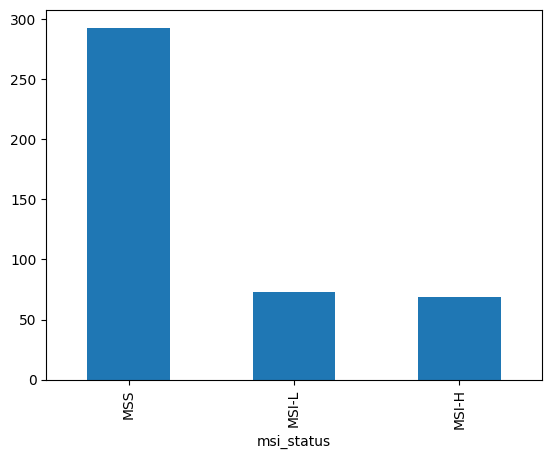

In [69]:
merged_df['msi_status'].value_counts().plot(kind = 'bar')

In [14]:
#oversampling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['msi_status_encoded'] = label_encoder.fit_transform(merged_df['msi_status'])
y = merged_df['msi_status_encoded']
X = merged_df.drop(['Unnamed: 0', 'msi_status', 'msi_status_encoded'], axis=1)
X = X.select_dtypes(include=[np.number])
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)  
X_resampled, y_resampled = smote.fit_resample(X, y)




In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[58  0  0  1  0]
 [ 0 54  0  1  1]
 [ 0  0 58  7  0]
 [ 0  0 11 43  3]
 [ 0  0  0  0 56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       1.00      0.96      0.98        56
           2       0.84      0.89      0.87        65
           3       0.83      0.75      0.79        57
           4       0.93      1.00      0.97        56

    accuracy                           0.92       293
   macro avg       0.92      0.92      0.92       293
weighted avg       0.92      0.92      0.92       293

